In [6]:
# print('dataset.x' ,dataset.x)
# print('dataset.edge_index' ,dataset.edge_index)
# print('dataset.edge_attr' ,dataset.edge_attr)
%load_ext autoreload
%autoreload 2
import sys
import torch

sys.path.insert(0,'/home/aw1223/ip/agile')

from sdk.ample import Ample

from torch_geometric.datasets import FakeDataset #TODO remove
from sdk.models.models import MLP_Model,Interaction_Net_Model

from torch_geometric.data import Data



class ToyModel_Lin(torch.nn.Module):
    def __init__(self, in_channels=32, out_channels=32, layer_count=1, hidden_dimension=32, precision = torch.float32):
        super().__init__()
        self.precision = precision
        self.layers = torch.nn.ModuleList()


        self.linear1 = MLP_Model(in_channels, out_channels) 
        self.linear1.name  = 'linear_embedder1'
        self.layers.append(self.linear1) #Used to map weights in SDK


        self.linear2 = MLP_Model(in_channels, out_channels) 
        self.linear2.name  = 'linear_embedder2'
        self.layers.append(self.linear2) #Used to map weights in SDK


        for layer in self.layers:
            layer.to(self.precision)

    def forward(self, x):
        outputs_model = []
        x = x.to(self.precision) 
        outputs_sub_model1,x = self.linear1(x)

        outputs_sub_model2,x = self.linear2(x)


        outputs_model = outputs_sub_model1 + outputs_sub_model2# + outputs_sub_model3#+ outputs_sub_model3 + outputs_sub_model4

        return outputs_model,x


class ToyModel(torch.nn.Module):
    def __init__(self, in_channels=32, out_channels=32, layer_count=1, hidden_dimension=32, precision = torch.float32):
        super().__init__()
        self.precision = precision
        self.layers = torch.nn.ModuleList()

        self.int_net = Interaction_Net_Model()
        self.int_net.name  = 'int_net'
        self.layers.append(self.int_net) #Used to map weights in SDK



        for layer in self.layers:
            layer.to(self.precision)


    def forward(self, x,edge_index,edge_attr):
        outputs_model = []
        x = x.to(self.precision) 

        outputs_model,x = self.int_net(x, edge_index, edge_attr)

        return outputs_model,x


model = ToyModel(32,32)

dataset = Data()
dataset.x = torch.tensor([[-2.0775e-01,  5.4138e-01, -9.3228e-01, -1.5647e-02, -9.2422e-01,
         -1.4551e+00,  1.1447e+00,  4.8944e-01, -1.2190e+00, -2.1434e+00,
          8.0335e-01, -1.3588e+00, -1.2911e+00,  1.1237e+00,  1.1250e-01,
          3.9626e-01,  5.1411e-01,  9.9543e-01,  7.6991e-02,  1.1795e+00,
         -1.2423e+00, -2.6467e-01, -4.9839e-01, -1.0298e+00, -2.2073e+00,
          1.7572e+00, -5.1693e-01,  1.4884e+00,  1.1717e+00, -1.6047e+00,
         -1.0268e+00,  1.6982e+00],
        [-1.8529e+00,  1.6048e+00, -6.7576e-01,  4.8206e-01, -7.3550e-01,
          2.7671e+00,  6.5742e-01,  1.1275e-01, -8.2426e-01,  9.4348e-01,
         -5.4252e-01,  1.3881e+00, -3.2231e-01,  2.2466e+00,  2.9660e-01,
         -3.3892e-01, -3.5646e-01,  1.7096e+00,  6.5559e-01,  9.3671e-01,
         -2.0564e-01, -2.5100e-01, -6.0347e-02, -9.6708e-01,  2.2658e+00,
          2.2228e-01, -2.8040e+00, -8.2614e-01,  5.2462e-01, -2.1695e+00,
         -1.4330e-02,  8.4461e-01],
        [ 6.7803e+00,  5.0186e+00,  5.3118e+00,  6.6033e+00,  5.3946e+00,
          4.0241e+00,  5.3939e+00,  5.0030e+00,  4.8918e+00,  3.9511e+00,
          6.0363e+00,  4.9824e+00,  5.2248e+00,  6.5227e+00,  5.0742e+00,
          4.1273e+00,  4.4227e+00,  5.2284e+00,  5.5740e+00,  6.3545e+00,
          4.3107e+00,  5.2994e+00,  5.3288e+00,  5.3148e+00,  5.8875e+00,
          5.0108e+00,  5.8182e+00,  4.4662e+00,  5.2387e+00,  6.0119e+00,
          4.5336e+00,  5.5987e+00]])
dataset.edge_index = torch.tensor([[ 0,  0,  0,  1,  1,  1, 2,  2,  2],
        [ 0,  1, 2,  0,  1,  2,  0,  1, 2]])
dataset.edge_attr =  torch.tensor([[-2.0775e-01,  5.4138e-01, -9.3228e-01, -1.5647e-02, -9.2422e-01,
         -1.4551e+00,  1.1447e+00,  4.8944e-01, -1.2190e+00, -2.1434e+00,
          8.0335e-01, -1.3588e+00, -1.2911e+00,  1.1237e+00,  1.1250e-01,
          3.9626e-01,  5.1411e-01,  9.9543e-01,  7.6991e-02,  1.1795e+00,
         -1.2423e+00, -2.6467e-01, -4.9839e-01, -1.0298e+00, -2.2073e+00,
          1.7572e+00, -5.1693e-01,  1.4884e+00,  1.1717e+00, -1.6047e+00,
         -1.0268e+00,  1.6982e+00],
        [-1.8529e+00,  1.6048e+00, -6.7576e-01,  4.8206e-01, -7.3550e-01,
          2.7671e+00,  6.5742e-01,  1.1275e-01, -8.2426e-01,  9.4348e-01,
         -5.4252e-01,  1.3881e+00, -3.2231e-01,  2.2466e+00,  2.9660e-01,
         -3.3892e-01, -3.5646e-01,  1.7096e+00,  6.5559e-01,  9.3671e-01,
         -2.0564e-01, -2.5100e-01, -6.0347e-02, -9.6708e-01,  2.2658e+00,
          2.2228e-01, -2.8040e+00, -8.2614e-01,  5.2462e-01, -2.1695e+00,
         -1.4330e-02,  8.4461e-01],
        [ 6.7803e+00,  5.0186e+00,  5.3118e+00,  6.6033e+00,  5.3946e+00,
          4.0241e+00,  5.3939e+00,  5.0030e+00,  4.8918e+00,  3.9511e+00,
          6.0363e+00,  4.9824e+00,  5.2248e+00,  6.5227e+00,  5.0742e+00,
          4.1273e+00,  4.4227e+00,  5.2284e+00,  5.5740e+00,  6.3545e+00,
          4.3107e+00,  5.2994e+00,  5.3288e+00,  5.3148e+00,  5.8875e+00,
          5.0108e+00,  5.8182e+00,  4.4662e+00,  5.2387e+00,  6.0119e+00,
          4.5336e+00,  5.5987e+00],
        [-2.0775e-01,  5.4138e-01, -9.3228e-01, -1.5647e-02, -9.2422e-01,
         -1.4551e+00,  1.1447e+00,  4.8944e-01, -1.2190e+00, -2.1434e+00,
          8.0335e-01, -1.3588e+00, -1.2911e+00,  1.1237e+00,  1.1250e-01,
          3.9626e-01,  5.1411e-01,  9.9543e-01,  7.6991e-02,  1.1795e+00,
         -1.2423e+00, -2.6467e-01, -4.9839e-01, -1.0298e+00, -2.2073e+00,
          1.7572e+00, -5.1693e-01,  1.4884e+00,  1.1717e+00, -1.6047e+00,
         -1.0268e+00,  1.6982e+00],
        [-1.8529e+00,  1.6048e+00, -6.7576e-01,  4.8206e-01, -7.3550e-01,
          2.7671e+00,  6.5742e-01,  1.1275e-01, -8.2426e-01,  9.4348e-01,
         -5.4252e-01,  1.3881e+00, -3.2231e-01,  2.2466e+00,  2.9660e-01,
         -3.3892e-01, -3.5646e-01,  1.7096e+00,  6.5559e-01,  9.3671e-01,
         -2.0564e-01, -2.5100e-01, -6.0347e-02, -9.6708e-01,  2.2658e+00,
          2.2228e-01, -2.8040e+00, -8.2614e-01,  5.2462e-01, -2.1695e+00,
         -1.4330e-02,  8.4461e-01],
        [ 6.7803e+00,  5.0186e+00,  5.3118e+00,  6.6033e+00,  5.3946e+00,
          4.0241e+00,  5.3939e+00,  5.0030e+00,  4.8918e+00,  3.9511e+00,
          6.0363e+00,  4.9824e+00,  5.2248e+00,  6.5227e+00,  5.0742e+00,
          4.1273e+00,  4.4227e+00,  5.2284e+00,  5.5740e+00,  6.3545e+00,
          4.3107e+00,  5.2994e+00,  5.3288e+00,  5.3148e+00,  5.8875e+00,
          5.0108e+00,  5.8182e+00,  4.4662e+00,  5.2387e+00,  6.0119e+00,
          4.5336e+00,  5.5987e+00],
          [-2.0775e-01,  5.4138e-01, -9.3228e-01, -1.5647e-02, -9.2422e-01,
         -1.4551e+00,  1.1447e+00,  4.8944e-01, -1.2190e+00, -2.1434e+00,
          8.0335e-01, -1.3588e+00, -1.2911e+00,  1.1237e+00,  1.1250e-01,
          3.9626e-01,  5.1411e-01,  9.9543e-01,  7.6991e-02,  1.1795e+00,
         -1.2423e+00, -2.6467e-01, -4.9839e-01, -1.0298e+00, -2.2073e+00,
          1.7572e+00, -5.1693e-01,  1.4884e+00,  1.1717e+00, -1.6047e+00,
         -1.0268e+00,  1.6982e+00],
        [-1.8529e+00,  1.6048e+00, -6.7576e-01,  4.8206e-01, -7.3550e-01,
          2.7671e+00,  6.5742e-01,  1.1275e-01, -8.2426e-01,  9.4348e-01,
         -5.4252e-01,  1.3881e+00, -3.2231e-01,  2.2466e+00,  2.9660e-01,
         -3.3892e-01, -3.5646e-01,  1.7096e+00,  6.5559e-01,  9.3671e-01,
         -2.0564e-01, -2.5100e-01, -6.0347e-02, -9.6708e-01,  2.2658e+00,
          2.2228e-01, -2.8040e+00, -8.2614e-01,  5.2462e-01, -2.1695e+00,
         -1.4330e-02,  8.4461e-01],
        [ 6.7803e+00,  5.0186e+00,  5.3118e+00,  6.6033e+00,  5.3946e+00,
          4.0241e+00,  5.3939e+00,  5.0030e+00,  4.8918e+00,  3.9511e+00,
          6.0363e+00,  4.9824e+00,  5.2248e+00,  6.5227e+00,  5.0742e+00,
          4.1273e+00,  4.4227e+00,  5.2284e+00,  5.5740e+00,  6.3545e+00,
          4.3107e+00,  5.2994e+00,  5.3288e+00,  5.3148e+00,  5.8875e+00,
          5.0108e+00,  5.8182e+00,  4.4662e+00,  5.2387e+00,  6.0119e+00,
          4.5336e+00,  5.5987e+00]])
# dataset = FakeDataset(
#                         num_graphs=1, 
#                         avg_num_nodes = 15,
#                         avg_degree=3,
#                         num_channels=32,
#                         edge_dim=0
#                     )[0]

# inputs = [dataset.x]
inputs = [dataset.x,dataset.edge_index,dataset.edge_attr]

out = model(*inputs)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
tensor([[-0.2077,  0.5414, -0.9323, -0.0156, -0.9242, -1.4551,  1.1447,  0.4894,
         -1.2190, -2.1434,  0.8033, -1.3588, -1.2911,  1.1237,  0.1125,  0.3963,
          0.5141,  0.9954,  0.0770,  1.1795, -1.2423, -0.2647, -0.4984, -1.0298,
         -2.2073,  1.7572, -0.5169,  1.4884,  1.1717, -1.6047, -1.0268,  1.6982],
        [-1.8529,  1.6048, -0.6758,  0.4821, -0.7355,  2.7671,  0.6574,  0.1128,
         -0.8243,  0.9435, -0.5425,  1.3881, -0.3223,  2.2466,  0.2966, -0.3389,
         -0.3565,  1.7096,  0.6556,  0.9367, -0.2056, -0.2510, -0.0603, -0.9671,
          2.2658,  0.2223, -2.8040, -0.8261,  0.5246, -2.1695, -0.0143,  0.8446],
        [ 6.7803,  5.0186,  5.3118,  6.6033,  5.3946,  4.0241,  5.3939,  5.0030,
          4.8918,  3.9511,  6.0363,  4.9824,  5.2248,  6.5227,  5.0742,  4.1273,
          4.4227,  5.2284,  5.5740,  6.3545,  4.3107,  5.2994,  5.3288,  5.3148,
          5.8875,  

weights
layers.0.layers.0.weight tensor([[ 0.0990,  0.1526,  0.1471,  ..., -0.0991,  0.0011,  0.1105],
        [ 0.0542, -0.0290, -0.0556,  ...,  0.0784, -0.0218,  0.1488],
        [ 0.0637,  0.1025, -0.0029,  ...,  0.1145,  0.1726,  0.0489],
        ...,
        [-0.1332,  0.1756, -0.0088,  ..., -0.1246,  0.1717, -0.1141],
        [ 0.0966,  0.0457,  0.1060,  ..., -0.0334,  0.0649,  0.0730],
        [ 0.1411, -0.1731, -0.0068,  ..., -0.1717, -0.0710,  0.1127]])
layers.0.layers.1.weight tensor([[ 0.0995, -0.1376,  0.0857,  ..., -0.1325, -0.1414, -0.0721],
        [ 0.0974,  0.0235,  0.0005,  ...,  0.1301, -0.0098, -0.1228],
        [ 0.0450,  0.1137,  0.0302,  ..., -0.0804, -0.0248,  0.0099],
        ...,
        [ 0.0730,  0.1712, -0.1098,  ...,  0.0672,  0.0160,  0.1225],
        [-0.1025,  0.1062, -0.0841,  ..., -0.1437, -0.0452,  0.0282],
        [ 0.0087, -0.0785, -0.1725,  ..., -0.1520, -0.0179,  0.0465]])
layers.0.layers.2.weight tensor([[ 0.1087,  0.0963,  0.1316,  ...,  0.1188

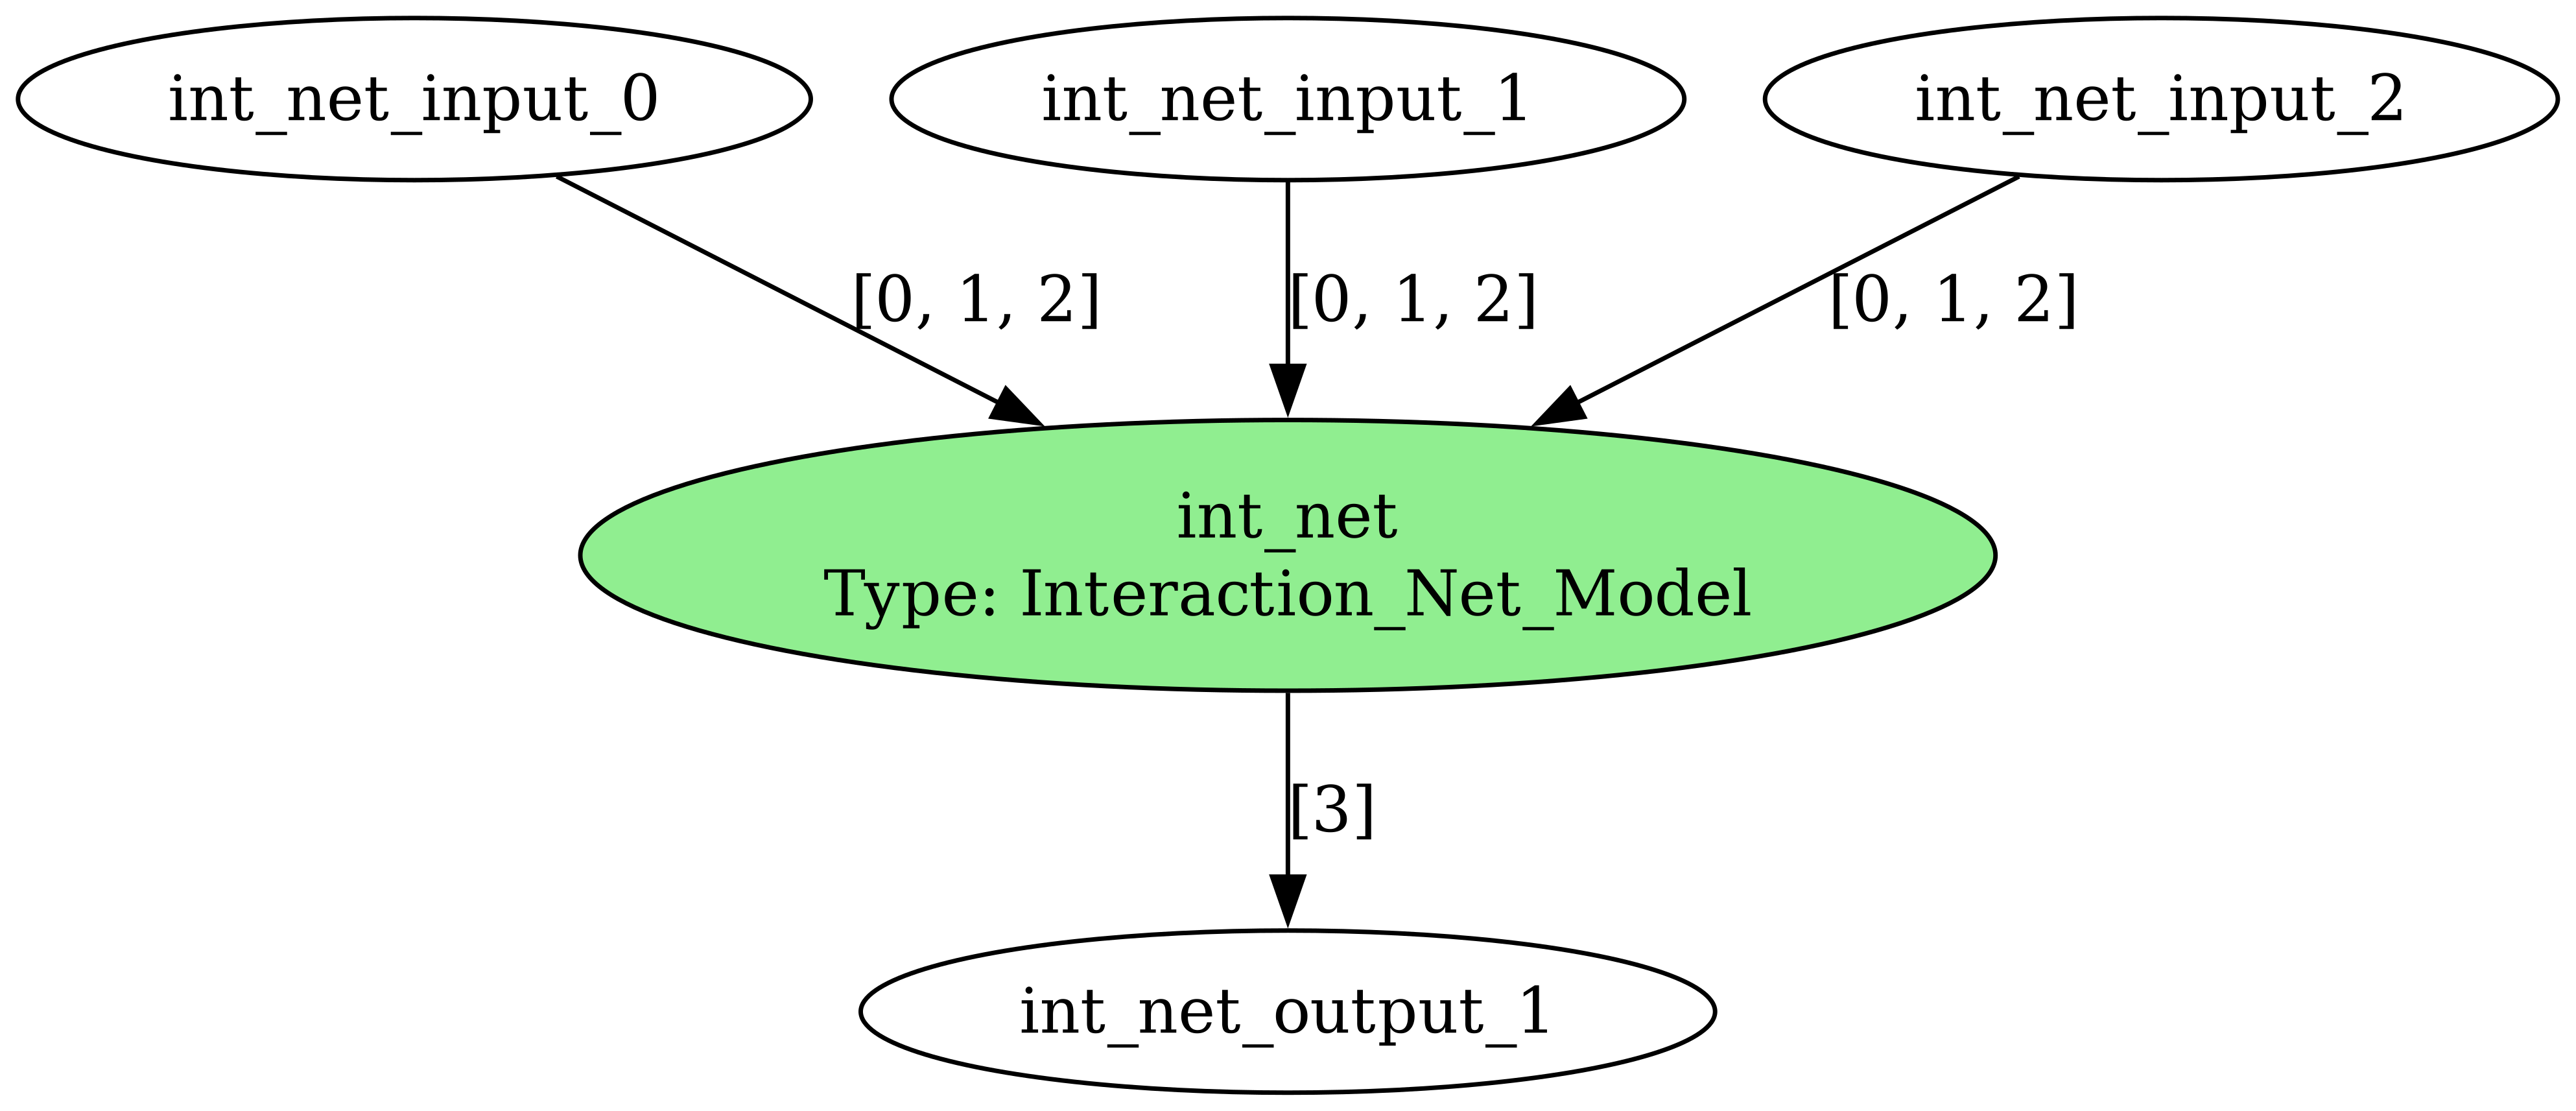

External inputs {'int_net_input_0': tensor([[-0.2077,  0.5414, -0.9323, -0.0156, -0.9242, -1.4551,  1.1447,  0.4894,
         -1.2190, -2.1434,  0.8033, -1.3588, -1.2911,  1.1237,  0.1125,  0.3963,
          0.5141,  0.9954,  0.0770,  1.1795, -1.2423, -0.2647, -0.4984, -1.0298,
         -2.2073,  1.7572, -0.5169,  1.4884,  1.1717, -1.6047, -1.0268,  1.6982],
        [-1.8529,  1.6048, -0.6758,  0.4821, -0.7355,  2.7671,  0.6574,  0.1128,
         -0.8243,  0.9435, -0.5425,  1.3881, -0.3223,  2.2466,  0.2966, -0.3389,
         -0.3565,  1.7096,  0.6556,  0.9367, -0.2056, -0.2510, -0.0603, -0.9671,
          2.2658,  0.2223, -2.8040, -0.8261,  0.5246, -2.1695, -0.0143,  0.8446],
        [ 6.7803,  5.0186,  5.3118,  6.6033,  5.3946,  4.0241,  5.3939,  5.0030,
          4.8918,  3.9511,  6.0363,  4.9824,  5.2248,  6.5227,  5.0742,  4.1273,
          4.4227,  5.2284,  5.5740,  6.3545,  4.3107,  5.2994,  5.3288,  5.3148,
          5.8875,  5.0108,  5.8182,  4.4662,  5.2387,  6.0119,  4.5336,

/home/aw1223/ip/agile/sdk/trained_graph.py:220: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dataset.edge_attr[idx] = torch.tensor(embd, dtype=torch.float)


tensor([-0.1597, -0.0532,  0.1505,  0.0495,  0.0270, -0.0294,  0.1307, -0.1149,
        -0.0832, -0.1181,  0.0753, -0.1045, -0.0120, -0.0422,  0.1487,  0.0304,
        -0.1115, -0.1352, -0.1209, -0.1445,  0.0046,  0.0399,  0.0793,  0.0778,
        -0.0858,  0.0795, -0.0714, -0.0878,  0.1756, -0.0350,  0.1420,  0.1187],
       grad_fn=<SelectBackward0>)
memory mapper weight 12
linear weight tensor([-0.0692, -0.1101, -0.0608, -0.0743, -0.0816, -0.0279, -0.1564,  0.1407,
         0.1323, -0.1524,  0.1470,  0.0828,  0.0322,  0.0542,  0.1411, -0.1239,
        -0.0737, -0.1629, -0.0063,  0.0954,  0.0006, -0.1331,  0.0970, -0.1414,
         0.0607,  0.1425, -0.0099,  0.1130,  0.0378,  0.0706,  0.1145,  0.0964],
       grad_fn=<SelectBackward0>)
memory mapper weight 13
linear weight tensor([ 0.1413,  0.1217, -0.0305,  0.0450, -0.1743,  0.0631, -0.0435, -0.0831,
         0.1386,  0.1552,  0.1565,  0.0032, -0.0919, -0.0548,  0.1556, -0.0728,
        -0.0643,  0.0113, -0.0192, -0.0310,  0.1230,  

1it [00:00, 10538.45it/s]


nodeslot_group genereation [{'node_id': 3, 'neighbour_count': 3, 'precision': 'FLOAT_32', 'aggregation_function': 'SUM', 'adjacency_list_address_msb': 0, 'scale_factors_address_lsb': 0, 'scale_factors_address_msb': 0, 'out_messages_address_lsb': 384, 'out_messages_address_msb': 0}, {'node_id': 4, 'neighbour_count': 3, 'precision': 'FLOAT_32', 'aggregation_function': 'SUM', 'adjacency_list_address_msb': 0, 'scale_factors_address_lsb': 0, 'scale_factors_address_msb': 0, 'out_messages_address_lsb': 512, 'out_messages_address_msb': 0}, {'node_id': 5, 'neighbour_count': 3, 'precision': 'FLOAT_32', 'aggregation_function': 'SUM', 'adjacency_list_address_msb': 0, 'scale_factors_address_lsb': 0, 'scale_factors_address_msb': 0, 'out_messages_address_lsb': 640, 'out_messages_address_msb': 0}, {'node_id': 6, 'neighbour_count': 3, 'precision': 'FLOAT_32', 'aggregation_function': 'SUM', 'adjacency_list_address_msb': 0, 'scale_factors_address_lsb': 0, 'scale_factors_address_msb': 0, 'out_messages_add

2it [00:00, 21902.37it/s]

Updated configuration successfully written back to file.
saving ToyModel(
  (layers): ModuleList(
    (0): Interaction_Net_Model(
      (layers): ModuleList(
        (0-2): 3 x Linear(in_features=32, out_features=32, bias=False)
        (3): AGG_MLP_Model(
          (lin): Linear(in_features=32, out_features=32, bias=False)
        )
        (4): Linear(in_features=32, out_features=32, bias=False)
        (5): AggregateEdges(
          (lin): Linear(in_features=32, out_features=32, bias=False)
        )
        (6): AGG_MLP_Model(
          (lin): Linear(in_features=32, out_features=32, bias=False)
        )
      )
      (src_embedder): Linear(in_features=32, out_features=32, bias=False)
      (edge_embedder): Linear(in_features=32, out_features=32, bias=False)
      (rx_embedder): Linear(in_features=32, out_features=32, bias=False)
      (edge_update): AGG_MLP_Model(
        (lin): Linear(in_features=32, out_features=32, bias=False)
      )
      (rx_node_embedder): Linear(in_feature

example_inputs make tuple (tensor([[-0.2077,  0.5414, -0.9323, -0.0156, -0.9242, -1.4551,  1.1447,  0.4894,
         -1.2190, -2.1434,  0.8033, -1.3588, -1.2911,  1.1237,  0.1125,  0.3963,
          0.5141,  0.9954,  0.0770,  1.1795, -1.2423, -0.2647, -0.4984, -1.0298,
         -2.2073,  1.7572, -0.5169,  1.4884,  1.1717, -1.6047, -1.0268,  1.6982],
        [-1.8529,  1.6048, -0.6758,  0.4821, -0.7355,  2.7671,  0.6574,  0.1128,
         -0.8243,  0.9435, -0.5425,  1.3881, -0.3223,  2.2466,  0.2966, -0.3389,
         -0.3565,  1.7096,  0.6556,  0.9367, -0.2056, -0.2510, -0.0603, -0.9671,
          2.2658,  0.2223, -2.8040, -0.8261,  0.5246, -2.1695, -0.0143,  0.8446],
        [ 6.7803,  5.0186,  5.3118,  6.6033,  5.3946,  4.0241,  5.3939,  5.0030,
          4.8918,  3.9511,  6.0363,  4.9824,  5.2248,  6.5227,  5.0742,  4.1273,
          4.4227,  5.2284,  5.5740,  6.3545,  4.3107,  5.2994,  5.3288,  5.3148,
          5.8875,  5.0108,  5.8182,  4.4662,  5.2387,  6.0119,  4.5336,  5.5987]

/home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/torch/jit/_trace.py:1091: TracerWarning: Encountering a list at the output of the tracer might cause the trace to be incorrect, this is only valid if the container structure does not change based on the module's inputs. Consider using a constant container instead (e.g. for `list`, use a `tuple` instead. for `dict`, use a `NamedTuple` instead). If you absolutely need this and know the side effects, pass strict=False to trace() to allow this behavior.
  module._c._create_method_from_trace(


tensor([[-0.2077,  0.5414, -0.9323, -0.0156, -0.9242, -1.4551,  1.1447,  0.4894,
         -1.2190, -2.1434,  0.8033, -1.3588, -1.2911,  1.1237,  0.1125,  0.3963,
          0.5141,  0.9954,  0.0770,  1.1795, -1.2423, -0.2647, -0.4984, -1.0298,
         -2.2073,  1.7572, -0.5169,  1.4884,  1.1717, -1.6047, -1.0268,  1.6982],
        [-1.8529,  1.6048, -0.6758,  0.4821, -0.7355,  2.7671,  0.6574,  0.1128,
         -0.8243,  0.9435, -0.5425,  1.3881, -0.3223,  2.2466,  0.2966, -0.3389,
         -0.3565,  1.7096,  0.6556,  0.9367, -0.2056, -0.2510, -0.0603, -0.9671,
          2.2658,  0.2223, -2.8040, -0.8261,  0.5246, -2.1695, -0.0143,  0.8446],
        [ 6.7803,  5.0186,  5.3118,  6.6033,  5.3946,  4.0241,  5.3939,  5.0030,
          4.8918,  3.9511,  6.0363,  4.9824,  5.2248,  6.5227,  5.0742,  4.1273,
          4.4227,  5.2284,  5.5740,  6.3545,  4.3107,  5.2994,  5.3288,  5.3148,
          5.8875,  5.0108,  5.8182,  4.4662,  5.2387,  6.0119,  4.5336,  5.5987]])
edge_attr torch.Size([9,

In [7]:
import torch.nn.init as init

print('weights')
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)


%load_ext autoreload
%autoreload 2
%pwd
ample = Ample()
ample.sim = True
# Need weights to be initialized before calling to_device
# model = GraphLam_Model(<parameters>)

model.to_device('ample',data=inputs) #Change 

# out = model(*inputs)

In [8]:
out = model(*inputs)


Executing on AMPLE
cd /home/aw1223/ip/agile/hw/sim
==== Running command: cd /home/aw1223/ip/agile/hw/sim; make run_sim
make -f Makefile.modelsim run_sim
make[1]: Entering directory '/home/aw1223/ip/agile/hw/sim'
set -o pipefail; LIBPYTHON_LOC=/home/aw1223/anaconda3/envs/ample/lib/libpython3.11.so.1.0 MODULE=runner TESTCASE= TOPLEVEL="work.top_wrapper" \
GPI_EXTRA= TOPLEVEL_LANG=verilog \
 /mnt/applications/mentor/modelsim-2019.2/modelsim/modeltech/linux_x86_64/vsim -c -64 -l sim_build/modelsim.log -onfinish exit -do sim_build/../simulate_no_gui.do -quiet -suppress vsim-3015  -pli /home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/cocotb/libs/libcocotbvpi_modelsim.so \
 \
work.work_opt \
 2>&1 | tee sim_build/simulate.log
/mnt/applications/mentor/modelsim-2019.2/modelsim/modeltech/linux_x86_64/vish: /mnt/applications/Xilinx/19.2/Vitis/2019.2/lib/lnx64.o/libxml2.so.2: no version information available (required by /lib64/libfontconfig.so.1)
/mnt/applications/mentor/modelsim-20